In [52]:
import pandas as pd
import geopandas as gpd
import GOSTnets as gn
import time
import logging
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
from shapely import wkt
from shapely.geometry import Point

# Mapa Lima - Callao

In [53]:
# mapaLimaCallao = pd.read_csv("rutas/MapaLimaCallao.csv")
# mapaLimaCallao['geometry'] = mapaLimaCallao['geometry'].apply(wkt.loads)
# mapaLimaCallao = gpd.GeoDataFrame(mapaLimaCallao, crs='epsg:4326')

mapaLimaCallao = pd.read_csv("rutas/MapaLimaCallao.csv")
gs = gpd.GeoSeries.from_wkt(mapaLimaCallao['geometry'])
mapaLimaCallao = gpd.GeoDataFrame(mapaLimaCallao, geometry=gs)
mapaLimaCallao.head()

,iddpto,departamen,idprov,provincia,iddist,distrito,capital,codccpp,area,fuente,geometry,LimaCallao
0,7,CALLAO,701,CALLAO,70105,LA PUNTA,LA PUNTA,1,1,INEI,"POLYGON ((-77.15884 -12.06645, -77.15874 -12.0...",True
1,7,CALLAO,701,CALLAO,70104,LA PERLA,LA PERLA,1,1,INEI,"POLYGON ((-77.10444 -12.07020, -77.10486 -12.0...",True
2,7,CALLAO,701,CALLAO,70102,BELLAVISTA,BELLAVISTA,1,1,INEI,"POLYGON ((-77.10086 -12.06307, -77.10317 -12.0...",True
3,7,CALLAO,701,CALLAO,70103,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,1,1,INEI,"POLYGON ((-77.08317 -12.03925, -77.08263 -12.0...",True
4,7,CALLAO,701,CALLAO,70101,CALLAO,CALLAO,1,1,INEI,"POLYGON ((-77.11219 -11.97352, -77.11203 -11.9...",True


<AxesSubplot:>

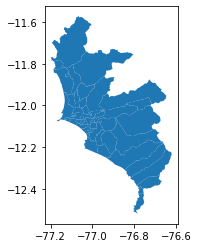

In [54]:
mapaLimaCallao.plot()

# Grafo transporte público

In [50]:
G = ox.load_graphml('rutas/GrafoTransporte.graphml')
G_nodes, G_edges = ox.graph_to_gdfs(G)
# nx.get_edge_attributes(G2, 'w3')
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 14207
Number of edges: 17930
Average in degree:   1.2621
Average out degree:   1.2621


# Transporte snap Grafo de Lima

In [5]:
rutas_nodes = pd.read_csv("rutas/RutasLima_snap_LimaNodes.csv", sep=";", index_col=[0,1])
gs = gpd.GeoSeries.from_wkt(rutas_nodes['geometry'])
rutas_nodes = gpd.GeoDataFrame(rutas_nodes, geometry=gs)

rutas_nodes.head()

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,11,12,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,,osmid,oneway,lanes,highway,maxspeed,length,ref,name_1,bridge,junction,...,width,service,ruta,name_2,geometry_layer,geometry_proj4,geometry,isPoint,lima_node,lima_node_dist
0,0,"[1046533254, 338193454, 143630423]",True,2,motorway,100,847.636,PE-1S,Carretera Panamericana Sur,yes,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78170 -12.37424 0.00000),True,472561534,0.000261
1,0,111929278,False,2,residential,NaN,9.345,NaN,Jirón Las Gardenias,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84721 -12.29979 0.00000),True,4337669195,0.000041
2,0,340019497,True,3,motorway,80,848.545,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84496 -12.30176 0.00000),True,3007012217,0.000452
3,0,435386375,True,2,motorway,80,958.197,PE-1S,Carretera Panamericana Sur,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.84502 -12.30188 0.00000),True,289310449,0.000407
4,0,39457637,True,1,trunk_link,80,15.187,NaN,NaN,NaN,NaN,...,NaN,NaN,8511,8511_Ida,Rtas_LimCal_30122021,+proj=longlat +datum=WGS84 +no_defs,POINT Z (-76.78189 -12.37441 0.00000),True,472561534,0.000061


# Amenities Lima

In [149]:
%%time
amenities = pd.read_csv("LimaOSM/LimaAmenities.csv")
gs = gpd.GeoSeries.from_wkt(amenities['geometry'])
amenities = gpd.GeoDataFrame(amenities, geometry=gs).set_index('osmid')

amenities.head()

<string>:2: DtypeWarning: Columns (5,6,7,11,12,13,14,16,17,18,19,20,21,23,24,25,26,27,29,30,31,34,43,44,45,46,47,48,49,50,51,52,53,54,55,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,2

CPU times: user 1.19 s, sys: 220 ms, total: 1.41 s
Wall time: 1.41 s


,unique_id,element_type,amenity,geometry_polygon,fee,wheelchair,wheelchair:description,addr:city,addr:housenumber,addr:street,...,trolleybus,allotments,name:it,wikipedia:en,wikipedia:pl,wikipedia:sv,diesel,shortest_name,isPoint,geometry
osmid,,,,,,,,,,,,,,,,,,,,,
1706421372,node/1706421372,node,bus_station,POINT (-76.90808560000001 -12.2550125),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90809 -12.25501)
1909452321,node/1909452321,node,toilets,POINT (-76.9071656 -12.2558628),no,no,No hay baño para silla de ruedas y encima tien...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90717 -12.25586)
1932465988,node/1932465988,node,townhall,POINT (-76.7734648 -12.4016275),NaN,NaN,NaN,Santa María del Mar,100,El Sardinero,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.77346 -12.40163)
2477708419,node/2477708419,node,restaurant,POINT (-76.8284223 -12.3324731),NaN,limited,Tiene baño para silla de ruedas y buena atencion,NaN,NaN,Calle Malecón Norte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82842 -12.33247)
2477757589,node/2477757589,node,restaurant,POINT (-76.8235383 -12.3382439),NaN,limited,No se si tiene baño para silla de ruedas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82354 -12.33824)


In [150]:
hospitals = pd.read_csv("LimaOSM/HospitalsOSM.csv")
gs = gpd.GeoSeries.from_wkt(hospitals['geometry'])
hospitals = gpd.GeoDataFrame(hospitals, geometry=gs)


hospitals['isPoint'] = hospitals.apply(lambda x: type(x.geometry) is Point , axis=1)
hospitals.rename(columns={'geometry':'geometry_polygon'}, inplace=True)
hospitals['geometry'] = hospitals.apply(lambda x: x['geometry_polygon'].centroid, axis=1)
hospitals.set_geometry('geometry')

hospitals['osmid'] = hospitals['osmid'].apply(abs)

hospitals.set_index('osmid', inplace=True)

hospitals.sort_index()

,osm_type,amenity,operator,name,geometry_polygon,element_type,isPoint,geometry
osmid,,,,,,,,
9721207,NaN,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Carabayllo,POINT (-77.03436 -11.90124),relation,True,POINT (-77.03436 -11.90124)
9721207,way,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Carabayllo,"POLYGON ((-77.03463 -11.90115, -77.03457 -11.9...",NaN,False,POINT (-77.03436 -11.90124)
9724165,way,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Comas,"MULTIPOLYGON (((-77.05736 -11.97045, -77.05703...",NaN,False,POINT (-77.05728 -11.97065)
9724165,NaN,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Comas,POINT (-77.05728 -11.97065),relation,True,POINT (-77.05728 -11.97065)
9724186,NaN,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Villa El Salvador,POINT (-76.95969 -12.19477),relation,True,POINT (-76.95969 -12.19477)
...,...,...,...,...,...,...,...,...
5396936323,node,hospital,NaN,Centro de Salud Hijos de Grau,POINT (-77.13207 -11.88533),NaN,True,POINT (-77.13207 -11.88533)
6733298187,node,hospital,NaN,Hospital de la Solidaridad Centro Lima,POINT (-77.03502 -12.04918),NaN,True,POINT (-77.03502 -12.04918)
6852754574,node,hospital,Gobierno Regional,Nac. Daniel A. Carrion,POINT (-77.12481 -12.06379),NaN,True,POINT (-77.12481 -12.06379)


In [151]:
cols = ['amenity', 'geometry']
df1 = amenities[cols]

df2 = hospitals[cols]
df3 = pd.concat([df1, df2])
df3

,amenity,geometry
osmid,,
1706421372,bus_station,POINT (-76.90809 -12.25501)
1909452321,toilets,POINT (-76.90717 -12.25586)
1932465988,townhall,POINT (-76.77346 -12.40163)
2477708419,restaurant,POINT (-76.82842 -12.33247)
2477757589,restaurant,POINT (-76.82354 -12.33824)
...,...,...
835415398,hospital,POINT (-76.94597 -12.06359)
866156340,hospital,POINT (-77.08060 -12.08686)
9721207,hospital,POINT (-77.03436 -11.90124)


In [154]:
# sum(df3.index < 0)

0

In [155]:
amenities = df3.sort_index().drop_duplicates()
amenities

,amenity,geometry
osmid,,
2710325,place_of_worship,POINT (-77.03910 -12.05126)
3901756,university,POINT (-76.94592 -12.08475)
6024025,townhall,POINT (-77.03116 -12.04526)
6173401,place_of_worship,POINT (-77.01776 -12.04785)
6252388,university,POINT (-77.08459 -12.05730)
...,...,...
8583333359,bench,POINT (-77.02873 -12.13428)
8583333360,bench,POINT (-77.02874 -12.13429)
8583376741,bicycle_rental,POINT (-77.02984 -12.13175)


<AxesSubplot:>

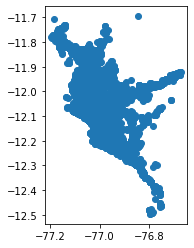

In [156]:
amenities.plot()

# Finding nearest lima node for each amenity point

In [203]:
AMENITY_TYPE = 'marketplace'

AMENITY_GRAFOTRANSPORTENODES_PATH = 'rutas/GrafoTransporteNodes_{}.csv'.format(AMENITY_TYPE.capitalize())
AMENITY_GRAFOTRANSPORTENODES_PATH2 = 'rutas/GrafoTransporteNodes_{}_2.csv'.format(AMENITY_TYPE.capitalize())

AMENITY_OSMID = '{}_osmid'.format(AMENITY_TYPE)
AMENITY_DIST = '{}_dist'.format(AMENITY_TYPE)
AMENITY_NEARESTNODE = '{}_nearestnode'.format(AMENITY_TYPE)

AMENITY_GRAFOTRANSPORTENODES_PATH, AMENITY_OSMID, \
AMENITY_DIST, AMENITY_NEARESTNODE, AMENITY_GRAFOTRANSPORTENODES_PATH2

('rutas/GrafoTransporteNodes_Marketplace.csv',
 'marketplace_osmid',
 'marketplace_dist',
 'marketplace_nearestnode',
 'rutas/GrafoTransporteNodes_Marketplace_2.csv')

In [204]:
%%time
grafoAndAmenity = pd.read_csv(AMENITY_GRAFOTRANSPORTENODES_PATH)
gs = gpd.GeoSeries.from_wkt(grafoAndAmenity['geometry'])
grafoAndAmenity = gpd.GeoDataFrame(grafoAndAmenity, geometry=gs).set_index('osmid')

grafoAndAmenity[[AMENITY_OSMID]] = grafoAndAmenity[[AMENITY_OSMID]].apply(abs)
# grafoAndAmenity.head()

amenities_list = list(set([abs(x) for x in grafoAndAmenity[AMENITY_OSMID].unique()]))
nodesNearAmenity = grafoAndAmenity.sort_values([AMENITY_OSMID, AMENITY_DIST])
nodesNearAmenity = nodesNearAmenity.drop_duplicates(subset=[AMENITY_OSMID], keep='first')
# nodesNearAmenity

amenity_dict = dict(zip(nodesNearAmenity[AMENITY_OSMID].values, nodesNearAmenity.index))
grafoAndAmenity[AMENITY_NEARESTNODE] = grafoAndAmenity[AMENITY_OSMID].apply(lambda x: amenity_dict[x]) 
grafoAndAmenity.to_csv(AMENITY_GRAFOTRANSPORTENODES_PATH2)
grafoAndAmenity.head()

CPU times: user 907 ms, sys: 4 ms, total: 911 ms
Wall time: 910 ms


,street_count,highway,ref,geometry,marketplace_osmid,marketplace_dist,marketplace_nearestnode
osmid,,,,,,,
1746796546,4,NaN,NaN,POINT (-76.97924 -12.04496),444766647,0.001614,5434288022
4284776453,4,NaN,NaN,POINT (-77.01989 -12.20070),584943911,0.001912,1287179550
4200497160,3,NaN,NaN,POINT (-77.09462 -12.06224),628151964,0.014344,592287414
5497389066,3,NaN,NaN,POINT (-76.80938 -12.02379),818108129,0.011406,1710761836
1746796556,4,NaN,NaN,POINT (-76.97494 -12.04523),471288523,0.003672,499590056


# Unificando amenities para el grafo

In [209]:
amenities_filter = ['bank','casino','courthouse','hospital','marketplace', 'police','school','university']

df_list = []

for amenity in amenities_filter:
    AMENITY_GRAFOTRANSPORTENODES_PATH = 'rutas/GrafoTransporteNodes_{}_2.csv'.format(amenity.capitalize())
    print(AMENITY_GRAFOTRANSPORTENODES_PATH)
    df = pd.read_csv(AMENITY_GRAFOTRANSPORTENODES_PATH)
    gs = gpd.GeoSeries.from_wkt(df['geometry'])
    df = gpd.GeoDataFrame(df, geometry=gs).set_index('osmid')
    df_list.append(df)

rutas/GrafoTransporteNodes_Bank_2.csv
rutas/GrafoTransporteNodes_Casino_2.csv
rutas/GrafoTransporteNodes_Courthouse_2.csv
rutas/GrafoTransporteNodes_Hospital_2.csv
rutas/GrafoTransporteNodes_Marketplace_2.csv
rutas/GrafoTransporteNodes_Police_2.csv
rutas/GrafoTransporteNodes_School_2.csv
rutas/GrafoTransporteNodes_University_2.csv


In [212]:
[x.shape for x in df_list]

[(14207, 7),
 (14207, 7),
 (14207, 7),
 (14207, 7),
 (14207, 7),
 (14207, 7),
 (14207, 7),
 (14207, 7)]

In [240]:
df_list[0].join(df_list[1], rsuffix="_x")

,street_count,highway,ref,geometry,bank_osmid,bank_dist,bank_nearestnode,street_count_x,highway_x,ref_x,geometry_x,casino_osmid,casino_dist,casino_nearestnode
osmid,,,,,,,,,,,,,,
1746796546,4,NaN,NaN,POINT (-76.97924 -12.04496),6064995185,0.012619,4356448438,4,NaN,NaN,POINT (-76.97924 -12.04496),437866700,0.014581,5421589589
4284776453,4,NaN,NaN,POINT (-77.01989 -12.20070),512156980,0.007747,4226751425,4,NaN,NaN,POINT (-77.01989 -12.20070),435838405,0.059789,263622404
4200497160,3,NaN,NaN,POINT (-77.09462 -12.06224),3962797297,0.002325,3812840428,3,NaN,NaN,POINT (-77.09462 -12.06224),435879639,0.005009,4337745396
5497389066,3,NaN,NaN,POINT (-76.80938 -12.02379),4378103036,0.016503,1745866411,3,NaN,NaN,POINT (-76.80938 -12.02379),438031676,0.142866,1273875162
1746796556,4,NaN,NaN,POINT (-76.97494 -12.04523),6064995185,0.009142,4356448438,4,NaN,NaN,POINT (-76.97494 -12.04523),437866700,0.011108,5421589589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442761203,4,traffic_signals,NaN,POINT (-76.99078 -12.16319),437380172,0.004742,4363628140,4,traffic_signals,NaN,POINT (-76.99078 -12.16319),437511292,0.020275,8742782795
1746796535,4,NaN,NaN,POINT (-76.97967 -12.04469),6064995185,0.012897,4356448438,4,NaN,NaN,POINT (-76.97967 -12.04469),437866700,0.014851,5421589589
416645112,4,NaN,NaN,POINT (-77.02853 -12.06847),4351683614,0.003456,416637968,4,NaN,NaN,POINT (-77.02853 -12.06847),4139069972,0.002965,416637968


In [241]:
df = df_list[0]
for i in range(1,8):
    df = df.join(df_list[i], rsuffix="_x")
#     df = pd.merge(df, df_list[i], how='left', left_index=True, right_index=True)

In [242]:
df.columns

Index(['street_count', 'highway', 'ref', 'geometry', 'bank_osmid', 'bank_dist',
       'bank_nearestnode', 'street_count_x', 'highway_x', 'ref_x',
       'geometry_x', 'casino_osmid', 'casino_dist', 'casino_nearestnode',
       'street_count_x', 'highway_x', 'ref_x', 'geometry_x',
       'courthouse_osmid', 'courthouse_dist', 'courthouse_nearestnode',
       'street_count_x', 'highway_x', 'ref_x', 'geometry_x', 'hospital_osmid',
       'hospital_dist', 'hospital_nearestnode', 'street_count_x', 'highway_x',
       'ref_x', 'geometry_x', 'marketplace_osmid', 'marketplace_dist',
       'marketplace_nearestnode', 'street_count_x', 'highway_x', 'ref_x',
       'geometry_x', 'police_osmid', 'police_dist', 'police_nearestnode',
       'street_count_x', 'highway_x', 'ref_x', 'geometry_x', 'school_osmid',
       'school_dist', 'school_nearestnode', 'street_count_x', 'highway_x',
       'ref_x', 'geometry_x', 'university_osmid', 'university_dist',
       'university_nearestnode'],
      dtype='o

In [337]:
cols = ['geometry', 
        'bank_osmid', 'bank_dist', 'bank_nearestnode', 
       'casino_osmid', 'casino_dist', 'casino_nearestnode',
        'courthouse_osmid', 'courthouse_dist', 'courthouse_nearestnode',
        'hospital_osmid', 'hospital_dist', 'hospital_nearestnode',
        'marketplace_osmid', 'marketplace_dist', 'marketplace_nearestnode',
        'police_osmid', 'police_dist', 'police_nearestnode',
        'school_osmid', 'school_dist', 'school_nearestnode',
        'university_osmid', 'university_dist','university_nearestnode'
       ]
graphdata = df[cols]
graphdata.to_csv("rutas/GrafoTransporteWithNearestAmenities.csv")


In [395]:
type(graphdata)

geopandas.geodataframe.GeoDataFrame

In [338]:
graphdata.head()

,geometry,bank_osmid,bank_dist,bank_nearestnode,casino_osmid,casino_dist,casino_nearestnode,courthouse_osmid,courthouse_dist,courthouse_nearestnode,...,marketplace_nearestnode,police_osmid,police_dist,police_nearestnode,school_osmid,school_dist,school_nearestnode,university_osmid,university_dist,university_nearestnode
osmid,,,,,,,,,,,,,,,,,,,,,
1746796546,POINT (-76.97924 -12.04496),6064995185,0.012619,4356448438,437866700,0.014581,5421589589,437855139,0.003054,1577564129,...,5434288022,319647076,0.002672,1273530429,5597188981,0.001735,1273984598,402752730,0.011732,492818316
4284776453,POINT (-77.01989 -12.20070),512156980,0.007747,4226751425,435838405,0.059789,263622404,6695199631,0.067560,1405153097,...,1287179550,318966590,0.006736,859740377,5256212344,0.001682,4284776453,437330219,0.011924,859740486
4200497160,POINT (-77.09462 -12.06224),3962797297,0.002325,3812840428,435879639,0.005009,4337745396,465071802,0.039975,6302726030,...,592287414,319641192,0.007625,317337823,369931684,0.002610,4200497160,6252388,0.011180,1409885155
5497389066,POINT (-76.80938 -12.02379),4378103036,0.016503,1745866411,438031676,0.142866,1273875162,487183431,0.061299,1524458694,...,1710761836,318788561,0.021431,1745858814,5580671097,0.002112,5497465142,701396579,0.046344,9725663604
1746796556,POINT (-76.97494 -12.04523),6064995185,0.009142,4356448438,437866700,0.011108,5421589589,437855139,0.004602,1577564129,...,499590056,319647076,0.001693,1273530429,5597196854,0.000628,1577564085,402752730,0.007461,492818316


In [339]:
graphdata.loc[[31035121]]

,geometry,bank_osmid,bank_dist,bank_nearestnode,casino_osmid,casino_dist,casino_nearestnode,courthouse_osmid,courthouse_dist,courthouse_nearestnode,...,marketplace_nearestnode,police_osmid,police_dist,police_nearestnode,school_osmid,school_dist,school_nearestnode,university_osmid,university_dist,university_nearestnode
osmid,,,,,,,,,,,,,,,,,,,,,
31035121,POINT (-77.04261 -12.04597),4387665379,0.001975,525867127,435522157,0.008793,915282634,3965041957,0.005905,888357854,...,310954409,319323286,0.0057,537845459,5592847192,0.002253,310954409,435835085,0.001878,582805028


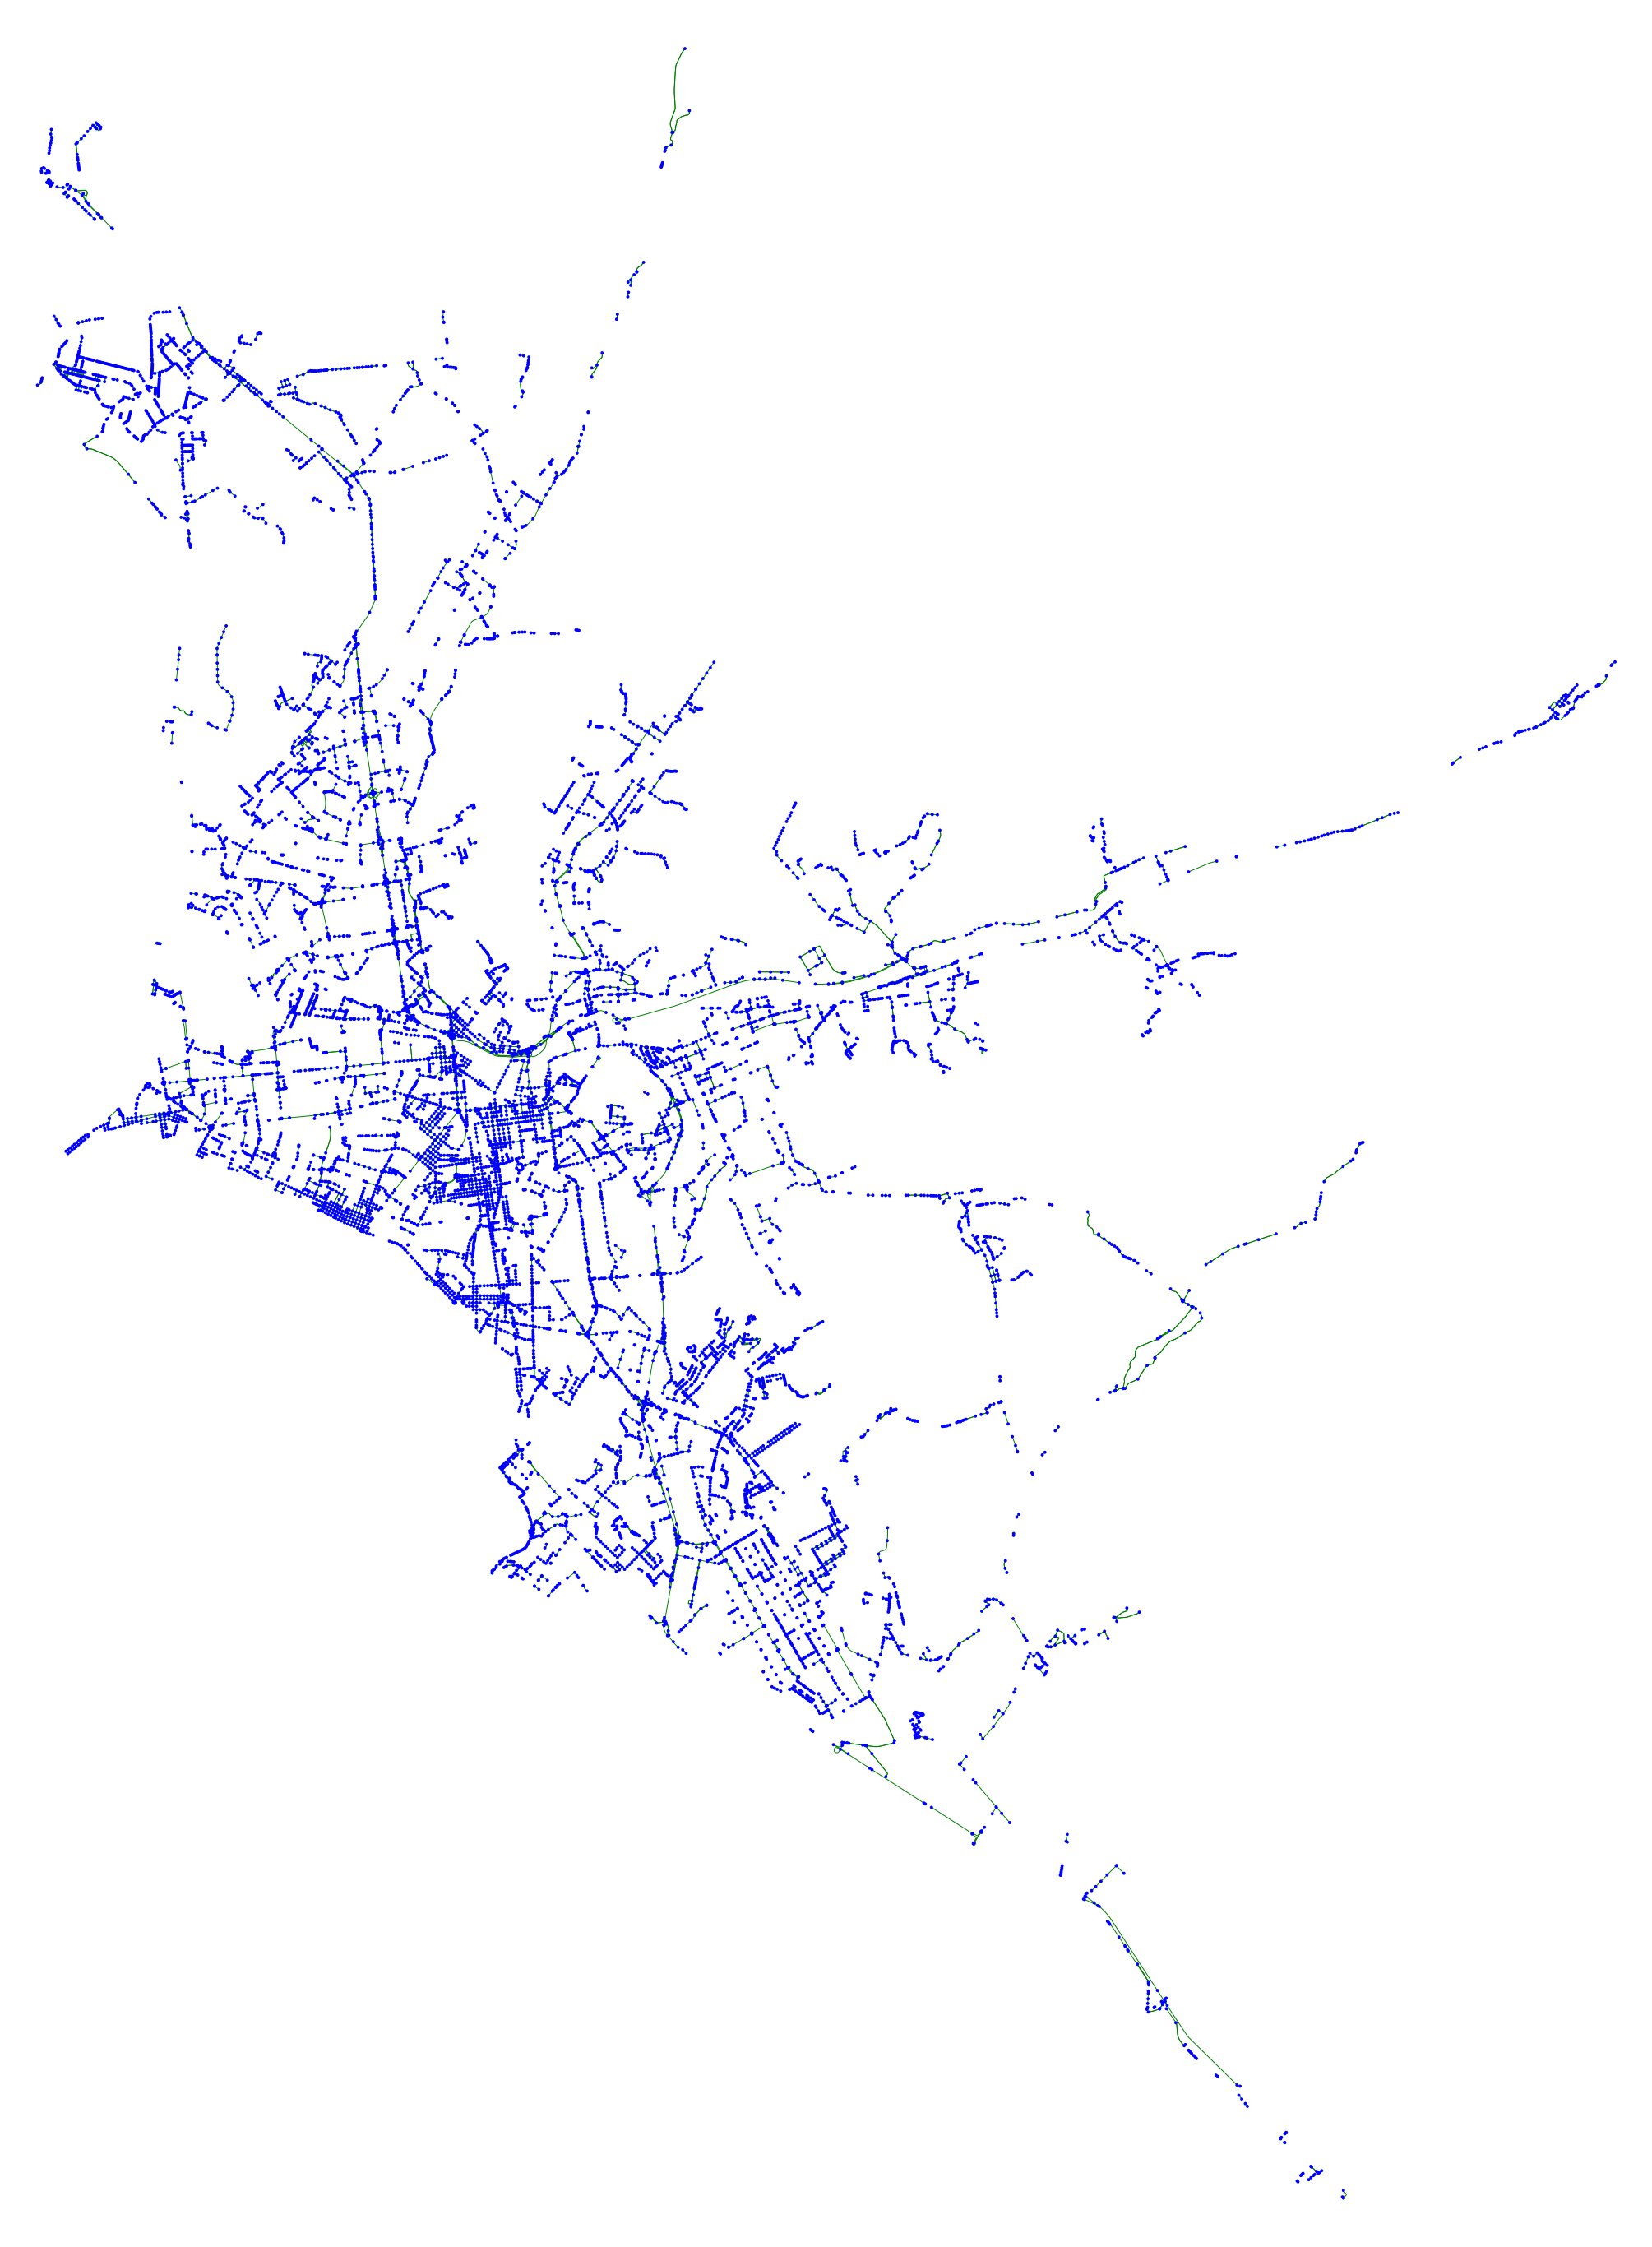

In [294]:
fig , ax = plt.subplots(figsize=(50,50))


# G_nodes.plot(ax=ax, color='blue')
# nodesNearAmenity.plot(ax=ax, color='blue')
# amenities.loc[amenities_list].plot(ax=ax, color='red', marker='x')
ax = G_nodes.loc[[31035121]].plot(ax=ax, color='red', marker='x')
# ax = G_nodes.loc[[525867127]].plot(ax=ax, color='cyan', marker='^')
ax = ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='green', ax=ax )

plt.show()
# amenities.loc[[319647076]].plot(ax=ax, color='cyan', marker='o')

# Nearest distance to amenities

In [268]:
import numpy as np
def shortest_path (G, source, target, weight='length'):
    distance = np.NaN
    try:
        distance = nx.shortest_path_length(G, source, target, weight)
    except Exception as e:
        distance = np.NaN
#         raise e
    return distance

In [340]:
graphdata.head()

,geometry,bank_osmid,bank_dist,bank_nearestnode,casino_osmid,casino_dist,casino_nearestnode,courthouse_osmid,courthouse_dist,courthouse_nearestnode,...,marketplace_nearestnode,police_osmid,police_dist,police_nearestnode,school_osmid,school_dist,school_nearestnode,university_osmid,university_dist,university_nearestnode
osmid,,,,,,,,,,,,,,,,,,,,,
1746796546,POINT (-76.97924 -12.04496),6064995185,0.012619,4356448438,437866700,0.014581,5421589589,437855139,0.003054,1577564129,...,5434288022,319647076,0.002672,1273530429,5597188981,0.001735,1273984598,402752730,0.011732,492818316
4284776453,POINT (-77.01989 -12.20070),512156980,0.007747,4226751425,435838405,0.059789,263622404,6695199631,0.067560,1405153097,...,1287179550,318966590,0.006736,859740377,5256212344,0.001682,4284776453,437330219,0.011924,859740486
4200497160,POINT (-77.09462 -12.06224),3962797297,0.002325,3812840428,435879639,0.005009,4337745396,465071802,0.039975,6302726030,...,592287414,319641192,0.007625,317337823,369931684,0.002610,4200497160,6252388,0.011180,1409885155
5497389066,POINT (-76.80938 -12.02379),4378103036,0.016503,1745866411,438031676,0.142866,1273875162,487183431,0.061299,1524458694,...,1710761836,318788561,0.021431,1745858814,5580671097,0.002112,5497465142,701396579,0.046344,9725663604
1746796556,POINT (-76.97494 -12.04523),6064995185,0.009142,4356448438,437866700,0.011108,5421589589,437855139,0.004602,1577564129,...,499590056,319647076,0.001693,1273530429,5597196854,0.000628,1577564085,402752730,0.007461,492818316


In [343]:
for a in amenities_filter:
    cad = "graphdata['{}_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['{}_nearestnode'] ), axis=1)".format(a,a)
    print(cad)


graphdata['bank_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['bank_nearestnode'] ), axis=1)
graphdata['casino_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['casino_nearestnode'] ), axis=1)
graphdata['courthouse_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['courthouse_nearestnode'] ), axis=1)
graphdata['hospital_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['hospital_nearestnode'] ), axis=1)
graphdata['marketplace_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['marketplace_nearestnode'] ), axis=1)
graphdata['police_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['police_nearestnode'] ), axis=1)
graphdata['school_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['school_nearestnode'] ), axis=1)
graphdata['university_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['university_nearestnode'] ), axis=1)


In [345]:
%%time
# print(nx.info(G))
graphdata['bank_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['bank_nearestnode'] ), axis=1)
graphdata['casino_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['casino_nearestnode'] ), axis=1)
graphdata['courthouse_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['courthouse_nearestnode'] ), axis=1)
graphdata['hospital_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['hospital_nearestnode'] ), axis=1)
graphdata['marketplace_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['marketplace_nearestnode'] ), axis=1)
graphdata['police_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['police_nearestnode'] ), axis=1)
graphdata['school_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['school_nearestnode'] ), axis=1)
graphdata['university_distance'] = graphdata.apply(lambda x: shortest_path(G ,x.name, x['university_nearestnode'] ), axis=1)

# shortest_path(G, 1746796546, 5421589589 )

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


CPU times: user 12.5 s, sys: 227 ms, total: 12.7 s
Wall time: 12.7 s


In [383]:
# for a in amenities_filter:
#     print("'{}_nearestnode', '{}_distance',".format(a,a))
    
for a in amenities_filter:
    print("'{}_distance', '{}_dist' ".format(a,a))

'bank_distance', 'bank_dist' 
'casino_distance', 'casino_dist' 
'courthouse_distance', 'courthouse_dist' 
'hospital_distance', 'hospital_dist' 
'marketplace_distance', 'marketplace_dist' 
'police_distance', 'police_dist' 
'school_distance', 'school_dist' 
'university_distance', 'university_dist' 


In [352]:
cols = [
    'geometry',
'bank_nearestnode', 'bank_distance',
'casino_nearestnode', 'casino_distance',
'courthouse_nearestnode', 'courthouse_distance',
'hospital_nearestnode', 'hospital_distance',
'marketplace_nearestnode', 'marketplace_distance',
'police_nearestnode', 'police_distance',
'school_nearestnode', 'school_distance',
'university_nearestnode', 'university_distance',
]
graphdata[cols].head()

,geometry,bank_nearestnode,bank_distance,casino_nearestnode,casino_distance,courthouse_nearestnode,courthouse_distance,hospital_nearestnode,hospital_distance,marketplace_nearestnode,marketplace_distance,police_nearestnode,police_distance,school_nearestnode,school_distance,university_nearestnode,university_distance
osmid,,,,,,,,,,,,,,,,,
1746796546,POINT (-76.97924 -12.04496),4356448438,NaN,5421589589,NaN,1577564129,NaN,1746828492,NaN,5434288022,NaN,1273530429,527.895,1273984598,810.748,492818316,NaN
4284776453,POINT (-77.01989 -12.20070),4226751425,NaN,263622404,NaN,1405153097,NaN,860682650,NaN,1287179550,163.971,859740377,NaN,4284776453,0.000,859740486,NaN
4200497160,POINT (-77.09462 -12.06224),3812840428,NaN,4337745396,NaN,6302726030,NaN,4200497160,0.0,592287414,NaN,317337823,NaN,4200497160,0.000,1409885155,884.259
5497389066,POINT (-76.80938 -12.02379),1745866411,NaN,1273875162,NaN,1524458694,NaN,1570070526,NaN,1710761836,NaN,1745858814,NaN,5497465142,NaN,9725663604,NaN
1746796556,POINT (-76.97494 -12.04523),4356448438,NaN,5421589589,NaN,1577564129,NaN,1273934832,NaN,499590056,NaN,1273530429,NaN,1577564085,NaN,492818316,NaN


In [399]:
graphdata.shape

(14207, 33)

# Process district

In [445]:
def process(distrito):
    #getting polygon for district
#     print("Getting polygon for district")
    distrito = distrito.upper()
#     distrito_polygon = mapaLimaCallao.query("distrito == @distrito")
#     distrito_polygon = distrito_polygon.geometry.values[0]
    
#     #getting district graph from OSM
#     distrito_graph = ox.graph.graph_from_polygon(distrito_polygon, network_type='drive')
#     distrito_nodes, distrito_edges = ox.graph_to_gdfs(distrito_graph)
#     print("Getting district graph from OSM")
#     print(nx.info(distrito_graph))
    
#     distrito_nodes2 = gn.pandana_snap_points(distrito_nodes, graphdata)
    filename = distrito.replace(" ","_")
    filename = "transporte_distritos/pandana_{}.csv".format(filename)
    
#     distrito_nodes2.to_csv(filename)
#     print("Snap distrito nodes with graphdata")
#     logging.info("{} saved with success".format(filename))
    
    distrito_nodes2 = pd.read_csv(filename)
    gs = gpd.GeoSeries.from_wkt(distrito_nodes2['geometry'])
    distrito_nodes2 = gpd.GeoDataFrame(distrito_nodes2, geometry=gs).set_index('osmid')
    
    tmp = distrito_nodes2.reset_index().merge(graphdata.reset_index(), how='left', left_on='NN', right_on='osmid')
#     tmp.head()
    
    cols = [
    'osmid_x',
    'geometry_x',
    'NN',
    'NN_dist',
    'bank_distance', 'bank_dist' ,
    'casino_distance', 'casino_dist' ,
    'courthouse_distance', 'courthouse_dist' ,
    'hospital_distance', 'hospital_dist' ,
    'marketplace_distance', 'marketplace_dist' ,
    'police_distance', 'police_dist' ,
    'school_distance', 'school_dist' ,
    'university_distance', 'university_dist',
    ]
    df = tmp[cols].copy()
    df.rename(columns={'geometry_x':'geometry', 'osmid_x':'osmid'}, inplace=True)

    # gs = gpd.GeoSeries.from_wkt(df['geometry'])
    df = gpd.GeoDataFrame(df).set_index('osmid')
    filename = distrito.replace(" ","_")
    df['distrito'] = filename
    filename = "transporte_distritos/{}.csv".format(filename)
    df.to_csv(filename)
    print("{} saved with success".format(filename))
    logging.info("{} saved with success".format(filename))

    
#     return distrito_polygon

In [444]:
distritos_lima = list(np.sort(mapaLimaCallao['distrito'].unique()))
distritos_lima

['ANCON',
 'ATE',
 'BARRANCO',
 'BELLAVISTA',
 'BREÑA',
 'CALLAO',
 'CARABAYLLO',
 'CARMEN DE LA LEGUA REYNOSO',
 'CHACLACAYO',
 'CHORRILLOS',
 'CIENEGUILLA',
 'COMAS',
 'EL AGUSTINO',
 'INDEPENDENCIA',
 'JESUS MARIA',
 'LA MOLINA',
 'LA PERLA',
 'LA PUNTA',
 'LA VICTORIA',
 'LIMA',
 'LINCE',
 'LOS OLIVOS',
 'LURIGANCHO',
 'LURIN',
 'MAGDALENA DEL MAR',
 'MI PERU',
 'MIRAFLORES',
 'PACHACAMAC',
 'PUCUSANA',
 'PUEBLO LIBRE',
 'PUENTE PIEDRA',
 'PUNTA HERMOSA',
 'PUNTA NEGRA',
 'RIMAC',
 'SAN BARTOLO',
 'SAN BORJA',
 'SAN ISIDRO',
 'SAN JUAN DE LURIGANCHO',
 'SAN JUAN DE MIRAFLORES',
 'SAN LUIS',
 'SAN MARTIN DE PORRES',
 'SAN MIGUEL',
 'SANTA ANITA',
 'SANTA MARIA DEL MAR',
 'SANTA ROSA',
 'SANTIAGO DE SURCO',
 'SURQUILLO',
 'VENTANILLA',
 'VILLA EL SALVADOR',
 'VILLA MARIA DEL TRIUNFO']

In [446]:
import logging
import time

logging.basicConfig(filename="process_districts.log", 
                    level=logging.DEBUG,
                    format='%(asctime)s :: %(levelname)s :: %(name)s :: %(message)s', 
                    datefmt='%Y-%m-%d %H:%M:%S',
                    filemode="w+")

for d in distritos_lima:
    start = time.time()
    try:
        process(d)
        end = time.time() - start
        logging.info("Process %s in %.3f seconds" % (d, end))
    except Exception as e:
        end = time.time() - start
        logging.info("Error with district %s in %.3f seconds" % (d, end))
        logging.debug(e)
    

transporte_distritos/ANCON.csv saved with success
transporte_distritos/ATE.csv saved with success
transporte_distritos/BARRANCO.csv saved with success
transporte_distritos/BELLAVISTA.csv saved with success
transporte_distritos/BREÑA.csv saved with success
transporte_distritos/CALLAO.csv saved with success
transporte_distritos/CARABAYLLO.csv saved with success
transporte_distritos/CARMEN_DE_LA_LEGUA_REYNOSO.csv saved with success
transporte_distritos/CHACLACAYO.csv saved with success
transporte_distritos/CHORRILLOS.csv saved with success
transporte_distritos/CIENEGUILLA.csv saved with success
transporte_distritos/COMAS.csv saved with success
transporte_distritos/EL_AGUSTINO.csv saved with success
transporte_distritos/INDEPENDENCIA.csv saved with success
transporte_distritos/JESUS_MARIA.csv saved with success
transporte_distritos/LA_MOLINA.csv saved with success
transporte_distritos/LA_PERLA.csv saved with success
transporte_distritos/LA_PUNTA.csv saved with success
transporte_distritos/

In [432]:
"san juan de miraflores".replace(" ","_")

'san_juan_de_miraflores'

In [441]:
%%time
process('callao')

transporte_distritos/CALLAO.csv saved with success
CPU times: user 452 ms, sys: 4.05 ms, total: 456 ms
Wall time: 455 ms


In [447]:
df = pd.read_csv("transporte_distritos/COMAS.csv")
gs = gpd.GeoSeries.from_wkt(df['geometry'])
df = gpd.GeoDataFrame(df, geometry=gs).set_index('osmid')    

In [448]:
df.head()

,geometry,NN,NN_dist,bank_distance,bank_dist,casino_distance,casino_dist,courthouse_distance,courthouse_dist,hospital_distance,hospital_dist,marketplace_distance,marketplace_dist,police_distance,police_dist,school_distance,school_dist,university_distance,university_dist,distrito
osmid,,,,,,,,,,,,,,,,,,,,
31043918,POINT (-77.05972 -11.97694),31043918,0.0,NaN,0.004479,NaN,0.012419,NaN,0.011886,NaN,0.002607,NaN,0.003885,NaN,0.003625,NaN,0.002249,NaN,0.005681,COMAS
31043921,POINT (-77.05950 -11.97699),31043921,0.0,NaN,0.004366,NaN,0.012392,NaN,0.011833,NaN,0.002389,NaN,0.003757,NaN,0.003523,NaN,0.002055,NaN,0.005892,COMAS
31043922,POINT (-77.05940 -11.97662),31043922,0.0,NaN,0.004700,NaN,0.012776,NaN,0.012207,NaN,0.002366,NaN,0.004075,NaN,0.003870,NaN,0.002260,NaN,0.005808,COMAS
31043923,POINT (-77.05957 -11.97652),31043923,0.0,NaN,0.004834,NaN,0.012848,NaN,0.012300,NaN,0.002555,NaN,0.004218,NaN,0.003994,NaN,0.002439,NaN,0.005615,COMAS
31080171,POINT (-77.05592 -11.96619),31080171,0.0,NaN,0.001293,NaN,0.008080,NaN,0.022912,NaN,0.004663,NaN,0.001357,NaN,0.011461,NaN,0.001757,NaN,0.010709,COMAS


# Unificando distritos

In [449]:
distritos_all = pd.DataFrame()
for distrito in distritos_lima:
    filename = distrito.replace(" ","_")
    filename = "transporte_distritos/{}.csv".format(filename)
#     df = pd.read_csv("transporte_distritos/COMAS.csv")
    df = pd.read_csv(filename)
    gs = gpd.GeoSeries.from_wkt(df['geometry'])
    df = gpd.GeoDataFrame(df, geometry=gs).set_index('osmid') 
    distritos_all = pd.concat([distritos_all, df])
    print(distritos_all.shape)

(2661, 20)
(10962, 20)
(11337, 20)
(12054, 20)
(12515, 20)
(17891, 20)
(27854, 20)
(28269, 20)
(29010, 20)
(32725, 20)
(34421, 20)
(40131, 20)
(41569, 20)
(43591, 20)
(44097, 20)
(46833, 20)
(47445, 20)
(47496, 20)
(48940, 20)
(51446, 20)
(51818, 20)
(55218, 20)
(59518, 20)
(62405, 20)
(62787, 20)
(63738, 20)
(65043, 20)
(68537, 20)
(69011, 20)
(69929, 20)
(76270, 20)
(77489, 20)
(78015, 20)
(79336, 20)
(79751, 20)
(81105, 20)
(82416, 20)
(95057, 20)
(99483, 20)
(100060, 20)
(107493, 20)
(108882, 20)
(110322, 20)
(110422, 20)
(111911, 20)
(115774, 20)
(116610, 20)
(124554, 20)
(130967, 20)
(137290, 20)


In [452]:
distritos_all.to_csv("transporte_distritos/LimaCallao_Distance2Amenities.csv")

# Por distrito

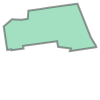

In [354]:
distrito = 'LINCE'
distrito_polygon = mapaLimaCallao.query("distrito == @distrito")
distrito_polygon = distrito_polygon.geometry.values[0]
distrito_polygon

In [355]:
%%time
distrito_graph = ox.graph.graph_from_polygon(distrito_polygon, network_type='drive')
distrito_nodes, distrito_edges = ox.graph_to_gdfs(distrito_graph)
print(nx.info(distrito_graph))


Name: 
Type: MultiDiGraph
Number of nodes: 372
Number of edges: 684
Average in degree:   1.8387
Average out degree:   1.8387
CPU times: user 1.72 s, sys: 19.9 ms, total: 1.74 s
Wall time: 1.74 s


<IPython.core.display.Javascript object>


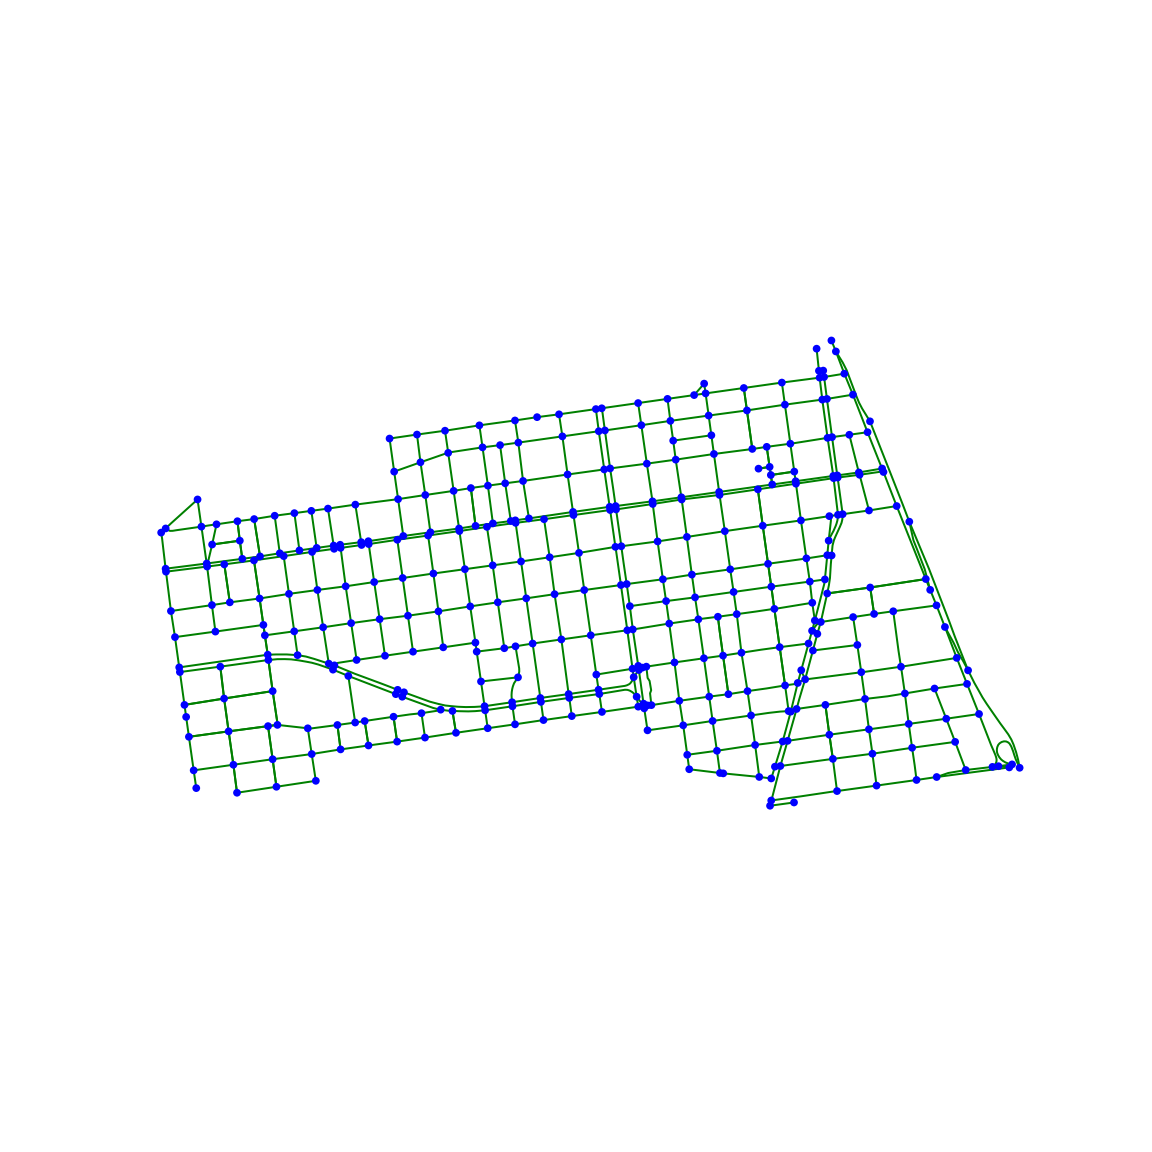

CPU times: user 242 ms, sys: 32.3 ms, total: 274 ms
Wall time: 188 ms


In [358]:
%%time
fig, ax = ox.plot_graph(distrito_graph, bgcolor='white', node_color='blue', edge_color='green', )

In [360]:
%%time
distrito_nodes2 = gn.pandana_snap_points(distrito_nodes, graphdata)

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initializatio

CPU times: user 20min 40s, sys: 19.7 s, total: 21min
Wall time: 21min


In [424]:
print("%s" % (distrito_nodes2.shape))

TypeError: not all arguments converted during string formatting

In [372]:
tmp = distrito_nodes2.reset_index().merge(graphdata.reset_index(), how='left', left_on='NN', right_on='osmid')
tmp.head()

,osmid_x,street_count,highway,ref,geometry_x,NN,NN_dist,osmid_y,geometry_y,bank_osmid,...,university_dist,university_nearestnode,bank_distance,casino_distance,courthouse_distance,hospital_distance,marketplace_distance,police_distance,school_distance,university_distance
0,108064601,3,NaN,NaN,POINT (-77.03362 -12.08976),4334525393,0.000623,4334525393,POINT (-77.03372 -12.08915),436465801,...,0.002812,263108214,NaN,NaN,NaN,NaN,NaN,NaN,14.316,NaN
1,108064608,4,traffic_signals,NaN,POINT (-77.03374 -12.08901),3063460620,0.000121,3063460620,POINT (-77.03363 -12.08906),436465801,...,0.002922,263108214,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN
2,108064612,4,traffic_signals,NaN,POINT (-77.03387 -12.08807),108064612,0.000000,108064612,POINT (-77.03387 -12.08807),4359723599,...,0.003414,263121280,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108064614,4,traffic_signals,NaN,POINT (-77.03405 -12.08693),263113593,0.001058,263113593,POINT (-77.03300 -12.08677),436478581,...,0.002012,263121280,139.463,688.689,738.210,1097.089,0.00,NaN,0.000,258.570
4,108064618,3,NaN,NaN,POINT (-77.03413 -12.08628),108064619,0.000626,108064619,POINT (-77.03422 -12.08566),435544145,...,0.001481,263121280,0.000,435.506,712.594,843.906,922.46,NaN,0.000,233.156


In [396]:
cols = [
'osmid_x',
'geometry_x',
'NN',
'NN_dist',
'bank_distance', 'bank_dist' ,
'casino_distance', 'casino_dist' ,
'courthouse_distance', 'courthouse_dist' ,
'hospital_distance', 'hospital_dist' ,
'marketplace_distance', 'marketplace_dist' ,
'police_distance', 'police_dist' ,
'school_distance', 'school_dist' ,
'university_distance', 'university_dist',
]
df = tmp[cols].copy()
df.rename(columns={'geometry_x':'geometry', 'osmid_x':'osmid'}, inplace=True)

# gs = gpd.GeoSeries.from_wkt(df['geometry'])
df = gpd.GeoDataFrame(df).set_index('osmid')

df.head()

,geometry,NN,NN_dist,bank_distance,bank_dist,casino_distance,casino_dist,courthouse_distance,courthouse_dist,hospital_distance,hospital_dist,marketplace_distance,marketplace_dist,police_distance,police_dist,school_distance,school_dist,university_distance,university_dist
osmid,,,,,,,,,,,,,,,,,,,
108064601,POINT (-77.03362 -12.08976),4334525393,0.000623,NaN,0.002079,NaN,0.004265,NaN,0.008192,NaN,0.007729,NaN,0.002941,NaN,0.006008,14.316,0.000243,NaN,0.002812
108064608,POINT (-77.03374 -12.08901),3063460620,0.000121,NaN,0.002083,NaN,0.004220,NaN,0.008118,NaN,0.007742,NaN,0.002830,NaN,0.006074,0.000,0.000218,NaN,0.002922
108064612,POINT (-77.03387 -12.08807),108064612,0.000000,0.000,0.001723,NaN,0.003214,NaN,0.007107,NaN,0.006938,NaN,0.002072,NaN,0.007093,NaN,0.000659,NaN,0.003414
108064614,POINT (-77.03405 -12.08693),263113593,0.001058,139.463,0.001114,688.689,0.002756,738.210,0.005974,1097.089,0.007063,0.00,0.000515,NaN,0.006784,0.000,0.000904,258.570,0.002012
108064618,POINT (-77.03413 -12.08628),108064619,0.000626,0.000,0.000265,435.506,0.001136,712.594,0.004678,843.906,0.005537,922.46,0.001763,NaN,0.007441,0.000,0.000323,233.156,0.001481


In [382]:
df.mean()

bank_distance            254.592163
casino_distance          806.613716
courthouse_distance      999.510386
hospital_distance        986.209008
marketplace_distance     619.781907
police_distance         1959.765909
school_distance          213.332013
university_distance      704.480309
dtype: float64

In [296]:
path = nx.shortest_path(G, 31035121, 525867127 )
path

[31035121,
 31035123,
 1363244036,
 31035125,
 3370179687,
 31035127,
 7564679763,
 4387399357,
 537845439,
 537845459,
 888357876,
 537845452,
 537845449,
 888357917,
 1841915451,
 6338630923,
 888357869,
 582805020,
 582805029,
 888357934,
 4334512405,
 262577623,
 582805030,
 888357854,
 888357888,
 888357899,
 888357873,
 257946702,
 257946633,
 1830374069,
 1841915469,
 1830374071,
 1830374072,
 1830374075,
 316632164,
 316632141,
 316632201,
 885797778,
 316632494,
 316632492,
 316632202,
 6129487414,
 885797822,
 31080125,
 1324511885,
 1324512660,
 31080123,
 9834751479,
 1324511355,
 1324511297,
 1273511093,
 1324512621,
 563862430,
 563862426,
 563862419,
 563862440,
 331610229,
 563862402,
 331610240,
 2400498279,
 885831143,
 31035512,
 31035295,
 31035294,
 31035304,
 31035313,
 31035273,
 31035249,
 2397317878,
 2832742959,
 2832742963,
 310953976,
 2053915052,
 2053915053,
 525863808,
 31035172,
 912508039,
 1841915460,
 1830379614,
 310954124,
 310954123,
 310954303,
 3

<IPython.core.display.Javascript object>


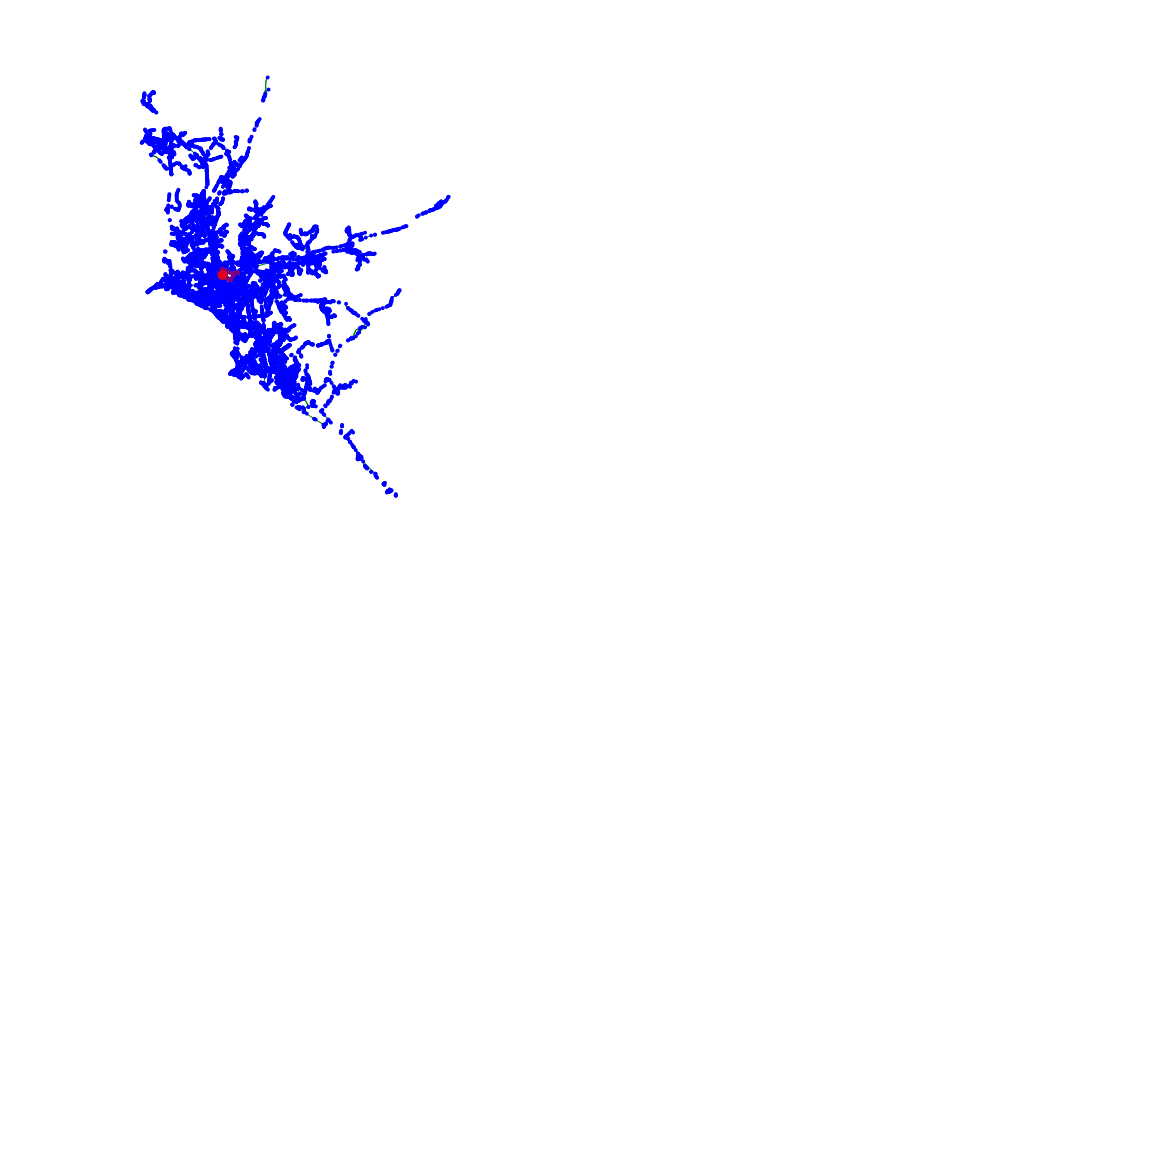

In [357]:
%matplotlib widget
# import contextily as ctx
# %matplotlib inline
# fig , ax = plt.subplots(figsize=(10,10))
# ctx.add_basemap(ax, ) 

# G_nodes.plot(ax=ax, color='blue')
# nodesNearAmenity.plot(ax=ax, color='blue')
# fig, ax = mapaLimaCallao.plot(ax=ax)
# amenities.loc[amenities_list].plot(ax=ax, color='red', marker='x')
# ax = G_nodes.loc[[31035121]].plot(ax=ax, color='red', marker='x')
# ax = G_nodes.loc[[525867127]].plot(ax=ax, color='cyan', marker='^')
fig, ax = ox.plot_graph_route(G, path, bgcolor='white', node_color='blue', edge_color='green', )
# ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='green', ax=ax)
# plt.show()